# Imports

In [216]:
try:
  import iminuit
  from iminuit import Minuit
  from iminuit.cost import LeastSquares
except:
  Exception('Error Initialising Iminuit')

In [217]:
import os
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt

from funcs import *
from stats import *

# funcs

In [218]:
def V_RC(t,V_o,R,C,T, offset):
    return V_o*( 1 - 2*(np.exp(-(t+offset)/(R*C))))
    return V_o*( 1 - 2*(np.exp(-(t+offset)/(R*C)) / (1+np.exp( -T/(R*C) ) ) ) )

def V_RC_2(t,V_o,R,C,T, offset):
    return -V_o*( 1 - 2*(np.exp(- ((t+offset)-(T/2)) /(R*C)) / (1+np.exp( -T/(R*C) ) ) ) )

def exp1(t,V_o,R,C,offset):
    return V_o*np.exp(-t/(R*C)) + offset

# RC

In [219]:
C_val = 49e-9
Rgs = []

## R = 700 $\Omega$

277


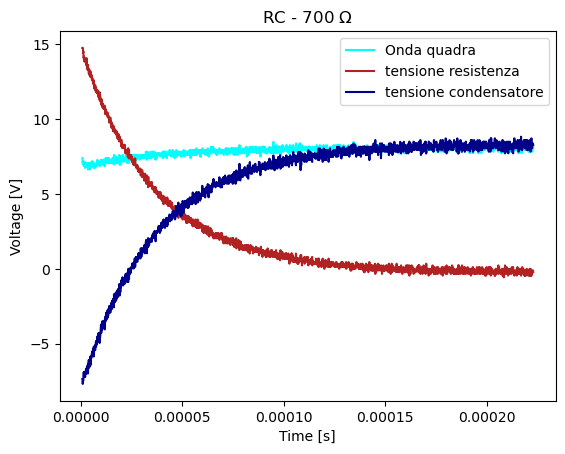

In [220]:
RC_700_quadra, RC_700_data, RC_700_math  = get_data('data/RC_700/')
RC_700_math = RC_700_data[0], (RC_700_quadra[1] - RC_700_data[1])

cut = True

i = 0
if cut:
    v = RC_700_data[1][0]
    while(v < np.max(RC_700_data[1])):
        v = RC_700_data[1][i]
        i+=1
    print(i)

plt.title('RC - 700 $\Omega$')
plt.plot(RC_700_quadra[0][i:],RC_700_quadra[1][i:], c='cyan')
plt.plot(RC_700_data[0][i:],  RC_700_data[1][i:],   c='firebrick')
plt.plot(RC_700_math[0][i:],  RC_700_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.show()

In [221]:
c = LeastSquares(RC_700_math[0][277:],RC_700_math[1][277:], .2, V_RC)
m = Minuit(c, R=700, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
R_g = m.values['R']-700
Rgs.append(R_g)
Latex(f'$R_g$ = {R_g} $\Omega$')

<IPython.core.display.Latex object>

In [222]:
print('pvalue = ',chi_test(m.fval, m.ndof, 4000))
plt.close()

pvalue =  0.31117440658952444


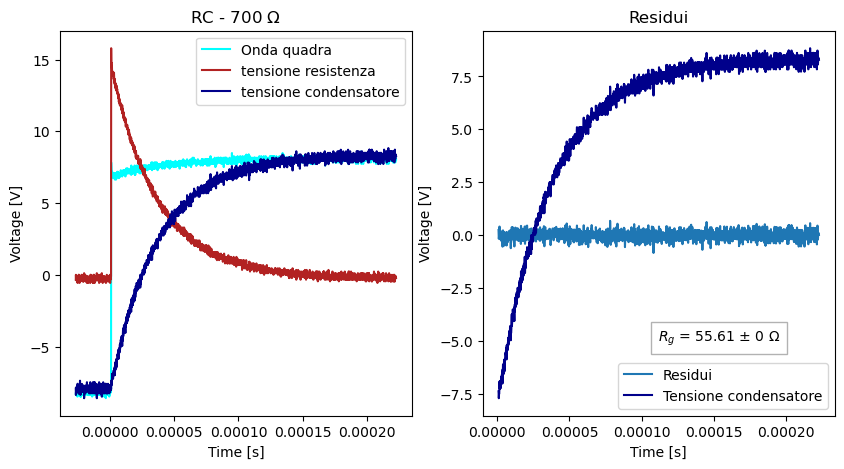

In [223]:
N = 277
resti = [i-j for i,j in zip(RC_700_math[1][N:],V_RC(RC_700_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]

plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RC - 700 $\Omega$')
plt.plot(RC_700_quadra[0][:],RC_700_quadra[1][:], c='cyan')
plt.plot(RC_700_data[0][:],  RC_700_data[1][:],   c='firebrick')
plt.plot(RC_700_math[0][:],  RC_700_math[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])

plt.subplot(1,2,2)
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_700_math[0][N:],resti)
plt.plot(RC_700_math[0][N:],RC_700_math[1][N:], c='darkblue')
plt.legend(['Residui','Tensione condensatore'])
plt.text(3*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.savefig('imgs/RC_700.pdf',bbox_inches='tight')

## R = 1000 $\Omega$

278


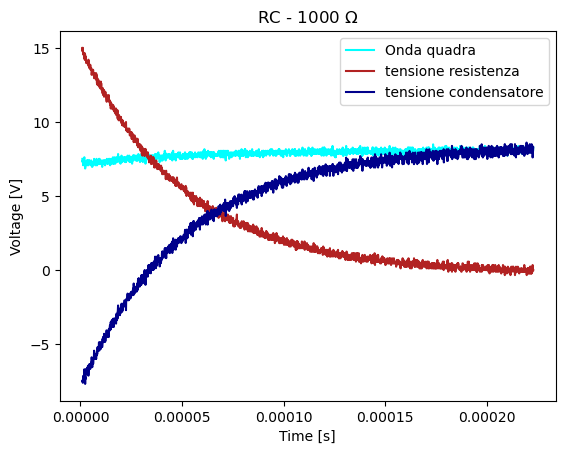

In [224]:
RC_1000_quadra, RC_1000_data, RC_1000_math  = get_data('data/RC_1000/')
RC_1000_math = RC_1000_data[0], (RC_1000_quadra[1] - RC_1000_data[1])

cut = True

i = 0
if cut:
    v = RC_1000_data[1][0]
    while(v < np.max(RC_1000_data[1])):
        v = RC_1000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 1000 $\Omega$')
plt.plot(RC_1000_quadra[0][i:],RC_1000_quadra[1][i:], c='cyan')
plt.plot(RC_1000_data[0][i:],  RC_1000_data[1][i:],   c='firebrick')
plt.plot(RC_1000_math[0][i:],  RC_1000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.show()

In [225]:
c = LeastSquares(RC_1000_math[0][278:],RC_1000_math[1][278:], .2, V_RC)
m = Minuit(c, R=1000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
R_g = m.values['R']-1000
Rgs.append(R_g)
Latex(f'$R_g$ = {R_g} $\Omega$')

<IPython.core.display.Latex object>

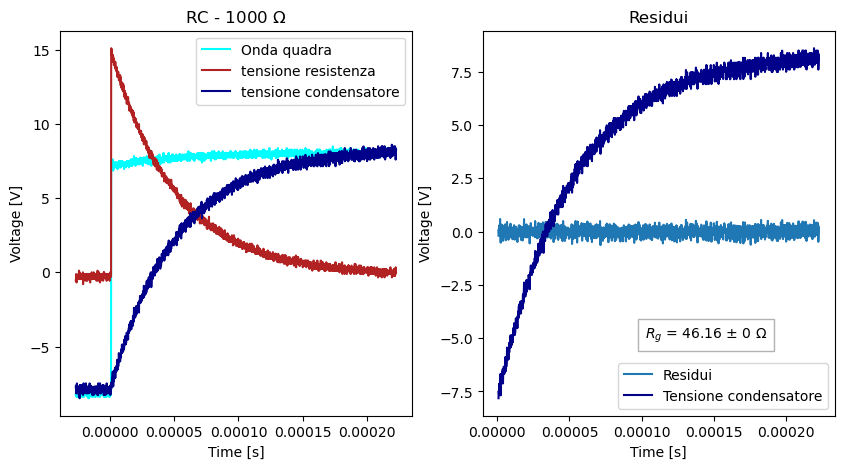

In [226]:
N = 277
resti = [i-j for i,j in zip(RC_1000_math[1][N:],V_RC(RC_1000_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RC - 1000 $\Omega$')
plt.plot(RC_1000_quadra[0][:],RC_1000_quadra[1][:], c='cyan')
plt.plot(RC_1000_data[0][:],  RC_1000_data[1][:],   c='firebrick')
plt.plot(RC_1000_math[0][:],  RC_1000_math[1][:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])

plt.subplot(1,2,2)
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_1000_math[0][N:],resti)
plt.plot(RC_1000_math[0][N:],RC_1000_math[1][N:], c='darkblue')
plt.legend(['Residui','Tensione condensatore'])
plt.text(2*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.savefig('imgs/RC_1000.pdf',bbox_inches='tight')

## R = 1400 $\Omega$

In [227]:
RC_1400_quadra, RC_1400_data, RC_1400_math  = get_data('data/RC_1400/')
RC_1400_math = RC_1400_data[0], (RC_1400_quadra[1] - RC_1400_data[1])

cut = True

i = 0
if cut:
    v = RC_1400_data[1][0]
    while(v < np.max(RC_1400_data[1])):
        v = RC_1400_data[1][i]
        i+=1
    print(i)

plt.title('RC - 1400 $\Omega$')
plt.plot(RC_1400_quadra[0][i:],RC_1400_quadra[1][i:], c='cyan')
plt.plot(RC_1400_data[0][i:],  RC_1400_data[1][i:],   c='firebrick')
plt.plot(RC_1400_math[0][i:],  RC_1400_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

108


In [228]:
c = LeastSquares(RC_1400_math[0][108:],RC_1400_math[1][108:], .2, V_RC)
m = Minuit(c, R=1400, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
R_g = m.values['R']-1400
Rgs.append(R_g)
Latex(f'$R_g$ = {R_g} $\Omega$')

<IPython.core.display.Latex object>

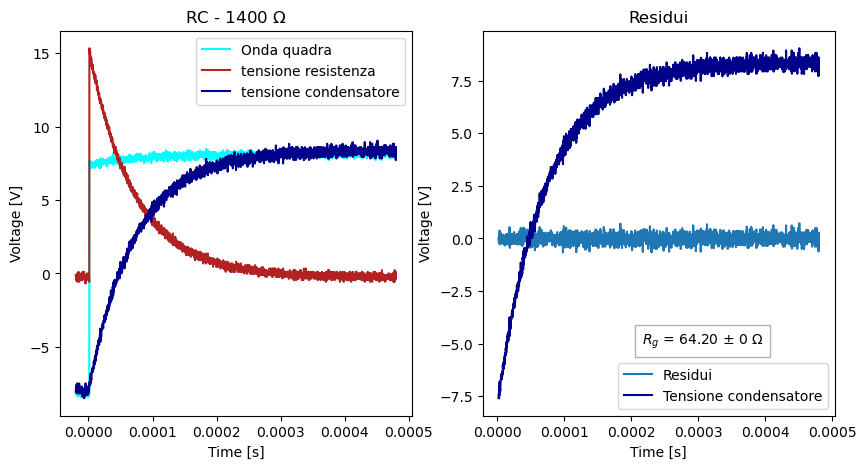

In [229]:
N = 108
resti = [i-j for i,j in zip(RC_1400_math[1][N:],V_RC(RC_1400_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RC - 1400 $\Omega$')
plt.plot(RC_1400_quadra[0][:],RC_1400_quadra[1][:], c='cyan')
plt.plot(RC_1400_data[0][:],  RC_1400_data[1][:],   c='firebrick')
plt.plot(RC_1400_math[0][:],  RC_1400_math[1][:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])

plt.subplot(1,2,2)
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_1400_math[0][N:],resti)
plt.plot(RC_1400_math[0][N:],RC_1400_math[1][N:], c='darkblue')
plt.legend(['Residui','Tensione condensatore'])
plt.text(3*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.savefig('imgs/RC_1400.pdf',bbox_inches='tight')

## R = 2000 $\Omega$

In [230]:
RC_2000_quadra, RC_2000_data, RC_2000_math  = get_data('data/RC_2000/')
RC_2000_math = RC_2000_data[0], (RC_2000_quadra[1] - RC_2000_data[1])

cut = True

i = 0
if cut:
    v = RC_2000_data[1][0]
    while(v < np.max(RC_2000_data[1])):
        v = RC_2000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 2000 $\Omega$')
plt.plot(RC_2000_quadra[0][i:],RC_2000_quadra[1][i:], c='cyan')
plt.plot(RC_2000_data[0][i:],  RC_2000_data[1][i:],   c='firebrick')
plt.plot(RC_2000_math[0][i:],  RC_2000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

110


In [231]:
c = LeastSquares(RC_2000_math[0][108:],RC_2000_math[1][108:], .2, V_RC)
m = Minuit(c, R=2000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
R_g = m.values['R']-2000
Rgs.append(R_g)
Latex(f'$R_g$ = {R_g} $\Omega$')

<IPython.core.display.Latex object>

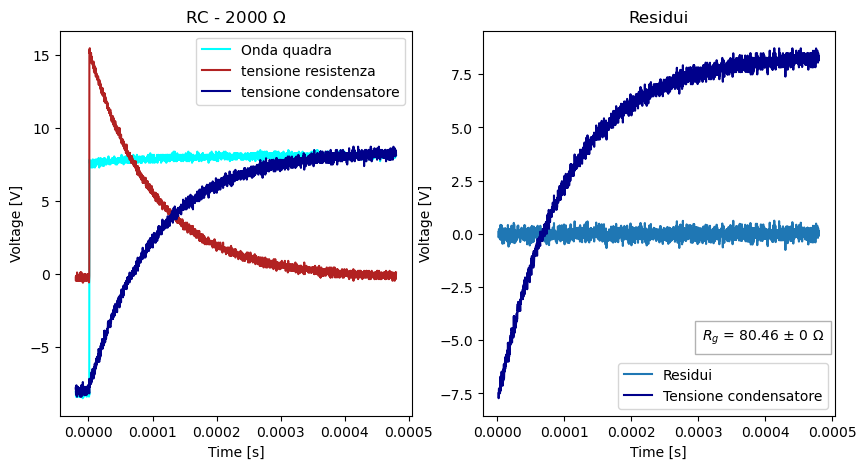

In [232]:
N = 108
resti = [i-j for i,j in zip(RC_2000_math[1][N:],V_RC(RC_2000_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RC - 2000 $\Omega$')
plt.plot(RC_2000_quadra[0][:],RC_2000_quadra[1][:], c='cyan')
plt.plot(RC_2000_data[0][:],  RC_2000_data[1][:],   c='firebrick')
plt.plot(RC_2000_math[0][:],  RC_2000_math[1][:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])

plt.subplot(1,2,2)
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_2000_math[0][N:],resti)
plt.plot(RC_2000_math[0][N:],RC_2000_math[1][N:], c='darkblue')
plt.legend(['Residui','Tensione condensatore'])
plt.text(3*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.savefig('imgs/RC_2000.pdf',bbox_inches='tight')

## R = 2400 $\Omega$

In [233]:
RC_2400_quadra, RC_2400_data, RC_2400_math  = get_data('data/RC_2400/')
RC_2400_math = RC_2400_data[0], (RC_2400_quadra[1] - RC_2400_data[1])

cut = True

i = 0
if cut:
    v = RC_2400_data[1][0]
    while(v < np.max(RC_2400_data[1])):
        v = RC_2400_data[1][i]
        i+=1
    print(i)

plt.title('RC - 2400 $\Omega$')
plt.plot(RC_2400_quadra[0][i:],RC_2400_quadra[1][i:], c='cyan')
plt.plot(RC_2400_data[0][i:],  RC_2400_data[1][i:],   c='firebrick')
plt.plot(RC_2400_math[0][i:],  RC_2400_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

117


In [234]:
c = LeastSquares(RC_2400_math[0][108:],RC_2400_math[1][108:], .2, V_RC)
m = Minuit(c, R=2400, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
R_g = m.values['R']-2400
Rgs.append(R_g)
Latex(f'$R_g$ = {R_g} $\Omega$')

<IPython.core.display.Latex object>

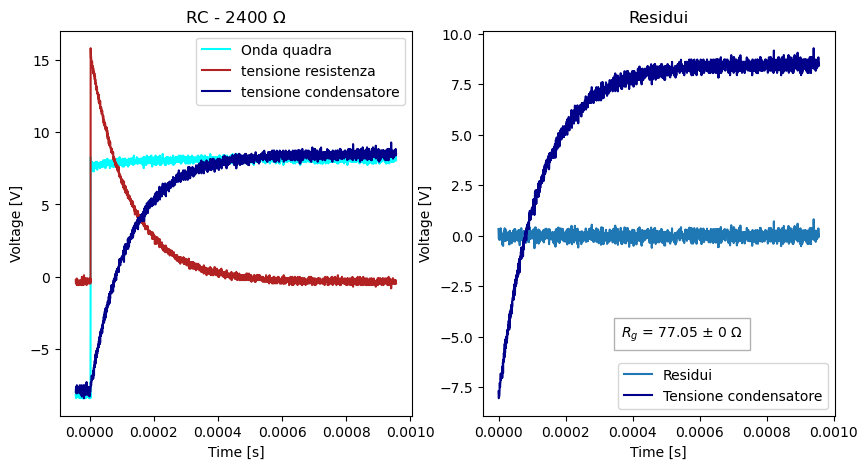

In [235]:
N = 108
resti = [i-j for i,j in zip(RC_2400_math[1][N:],V_RC(RC_2400_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RC - 2400 $\Omega$')
plt.plot(RC_2400_quadra[0][:],RC_2400_quadra[1][:], c='cyan')
plt.plot(RC_2400_data[0][:],  RC_2400_data[1][:],   c='firebrick')
plt.plot(RC_2400_math[0][:],  RC_2400_math[1][:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])

plt.subplot(1,2,2)
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_2400_math[0][N:],resti)
plt.plot(RC_2400_math[0][N:],RC_2400_math[1][N:], c='darkblue')
plt.text(3*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.legend(['Residui','Tensione condensatore'])
plt.savefig('imgs/RC_2400.pdf',bbox_inches='tight')

## R = 3000 $\Omega$

In [236]:
RC_3000_quadra, RC_3000_data, RC_3000_math  = get_data('data/RC_3000/')
RC_3000_math = RC_3000_data[0], (RC_3000_quadra[1] - RC_3000_data[1])

cut = True

i = 0
if cut:
    v = RC_3000_data[1][0]
    while(v < np.max(RC_3000_data[1])):
        v = RC_3000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 3000 $\Omega$')
plt.plot(RC_3000_quadra[0][i:],RC_3000_quadra[1][i:], c='cyan')
plt.plot(RC_3000_data[0][i:],  RC_3000_data[1][i:],   c='firebrick')
plt.plot(RC_3000_math[0][i:],  RC_3000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

117


In [237]:
c = LeastSquares(RC_3000_math[0][108:],RC_3000_math[1][108:], .2, V_RC)
m = Minuit(c, R=3000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
R_g = m.values['R']-3000
Rgs.append(R_g)
Latex(f'$R_g$ = {R_g} $\Omega$')

<IPython.core.display.Latex object>

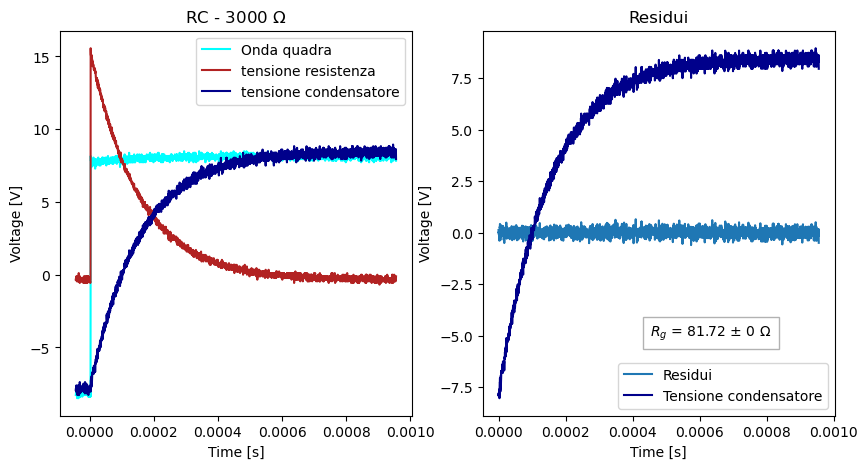

In [238]:
N = 108
resti = [i-j for i,j in zip(RC_3000_math[1][N:],V_RC(RC_3000_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RC - 3000 $\Omega$')
plt.plot(RC_3000_quadra[0][:],RC_3000_quadra[1][:], c='cyan')
plt.plot(RC_3000_data[0][:],  RC_3000_data[1][:],   c='firebrick')
plt.plot(RC_3000_math[0][:],  RC_3000_math[1][:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])

plt.subplot(1,2,2)
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_3000_math[0][N:],resti)
plt.plot(RC_3000_math[0][N:],RC_3000_math[1][N:], c='darkblue')
plt.text(3*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.legend(['Residui','Tensione condensatore'])
plt.savefig('imgs/RC_3000.pdf',bbox_inches='tight')

## R = 4000 $\Omega$

In [239]:
RC_4000_quadra, RC_4000_data, RC_4000_math  = get_data('data/RC_4000/')
RC_4000_math = RC_4000_data[0], (RC_4000_quadra[1] - RC_4000_data[1])

cut = True

i = 0
if cut:
    v = RC_4000_data[1][0]
    while(v < np.max(RC_4000_data[1])):
        v = RC_4000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 4000 $\Omega$')
plt.plot(RC_4000_quadra[0][i:],RC_4000_quadra[1][i:], c='cyan')
plt.plot(RC_4000_data[0][i:],  RC_4000_data[1][i:],   c='firebrick')
plt.plot(RC_4000_math[0][i:],  RC_4000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

117


In [240]:
c = LeastSquares(RC_4000_math[0][108:],RC_4000_math[1][108:], .2, V_RC)
m = Minuit(c, R=4000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
R_g = m.values['R']-4000
Rgs.append(R_g)
Latex(f'$R_g$ = {R_g} $\Omega$')

<IPython.core.display.Latex object>

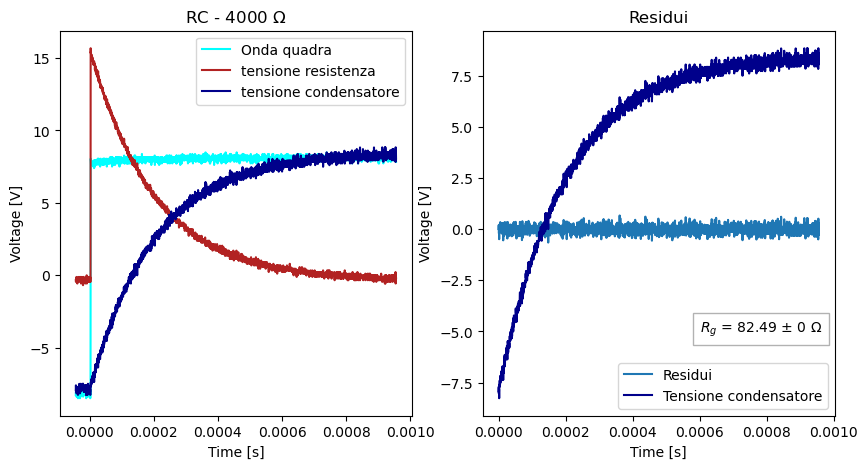

In [241]:
N = 108
resti = [i-j for i,j in zip(RC_4000_math[1][N:],V_RC(RC_4000_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RC - 4000 $\Omega$')
plt.plot(RC_4000_quadra[0][:],RC_4000_quadra[1][:], c='cyan')
plt.plot(RC_4000_data[0][:],  RC_4000_data[1][:],   c='firebrick')
plt.plot(RC_4000_math[0][:],  RC_4000_math[1][:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])

plt.subplot(1,2,2)
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_4000_math[0][N:],resti)
plt.plot(RC_4000_math[0][N:],RC_4000_math[1][N:], c='darkblue')
plt.text(3*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.legend(['Residui','Tensione condensatore'])
plt.savefig('imgs/RC_4000.pdf',bbox_inches='tight')

## R = 6000 $\Omega$

In [242]:
RC_6000_quadra, RC_6000_data, RC_6000_math  = get_data('data/RC_6000/')
RC_6000_math = RC_6000_data[0], (RC_6000_quadra[1] - RC_6000_data[1])

cut = True

i = 0
if cut:
    v = RC_6000_data[1][0]
    while(v < np.max(RC_6000_data[1])):
        v = RC_6000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 6000 $\Omega$')
plt.plot(RC_6000_quadra[0][i:],RC_6000_quadra[1][i:], c='cyan')
plt.plot(RC_6000_data[0][i:],  RC_6000_data[1][i:],   c='firebrick')
plt.plot(RC_6000_math[0][i:],  RC_6000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.text(3*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

103


In [243]:
c = LeastSquares(RC_6000_math[0][108:],RC_6000_math[1][108:], .2, V_RC)
m = Minuit(c, R=6000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
R_g = m.values['R']-6000
Rgs.append(R_g)
Latex(f'$R_g$ = {R_g} $\Omega$')

<IPython.core.display.Latex object>

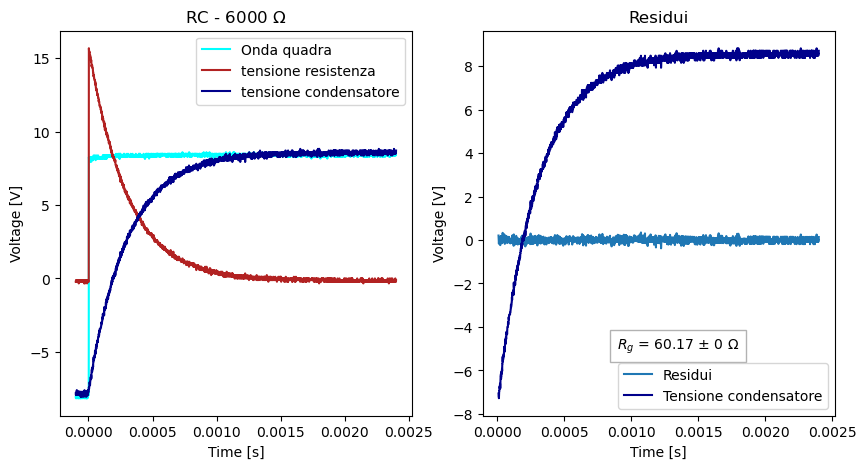

In [244]:
N = 108
resti = [i-j for i,j in zip(RC_6000_math[1][N:],V_RC(RC_6000_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RC - 6000 $\Omega$')
plt.plot(RC_6000_quadra[0][:],RC_6000_quadra[1][:], c='cyan')
plt.plot(RC_6000_data[0][:],  RC_6000_data[1][:],   c='firebrick')
plt.plot(RC_6000_math[0][:],  RC_6000_math[1][:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])

plt.subplot(1,2,2)
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_6000_math[0][N:],resti)
plt.plot(RC_6000_math[0][N:],RC_6000_math[1][N:], c='darkblue')
plt.text(3*m.values['R']*m.values['C'],-5,f'$R_g$ = {"{:.2f}".format(R_g)} $\pm$ {0} $\Omega$', bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 5})
plt.legend(['Residui','Tensione condensatore'])
plt.savefig('imgs/RC_6000.pdf',bbox_inches='tight')

68.48138240201449 12.94115516422351


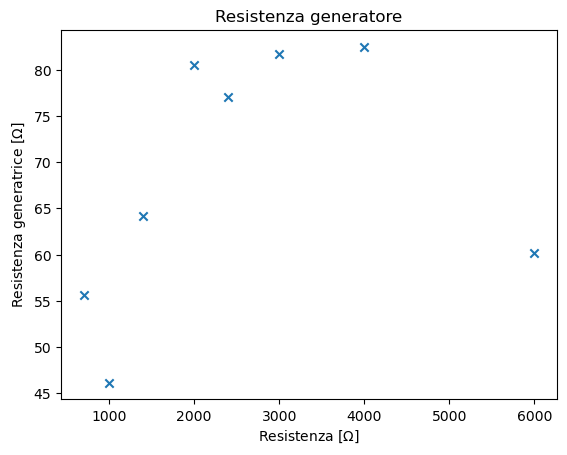

In [254]:
Rs = [700,1000,1400,2000,2400,3000,4000,6000]
plt.title('Resistenza generatore')
plt.xlabel('Resistenza [$\Omega$]')
plt.ylabel('Resistenza generatrice [$\Omega$]')
plt.scatter(Rs,Rgs, marker='x')
print(np.mean(Rgs), np.std(Rgs))